In [1]:
import os
os.getcwd()

In [2]:
os.chdir('C:/Users/kran0007/Downloads')

In [3]:
import pandas as pd 
df=pd.read_csv('Gender Purchase.csv') 
df.head()

,Gender,Purchase
0,Female,Yes
1,Female,Yes
2,Female,No
3,Male,No
4,Male,Yes


In [4]:
contingency_table=pd.crosstab(df['Gender'],df['Purchase']) 
contingency_table

Purchase,No,Yes
Gender,,
Female,106,159
Male,125,121


In [5]:
contingency_table.sum(axis=1) 
contingency_table.sum(axis=0)

Purchase
No     231
Yes    280
dtype: int64

In [6]:
contingency_table.astype('float').div(contingency_table. sum(axis=1),axis=0) 

Purchase,No,Yes
Gender,,
Female,0.40000,0.60000
Male,0.50813,0.49187


In [7]:
import pandas as pd 
bank=pd.read_csv('bank.csv',sep=';') 
bank.head() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [9]:
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
bank['y']=(bank['y']=='yes').astype(int) 

In [11]:
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [12]:
import numpy as np 
bank['education']=np.where(bank['education'] =='basic.9y', 'Basic', bank['education']) 
bank['education']=np.where(bank['education'] =='basic.6y', 'Basic', bank['education']) 
bank['education']=np.where(bank['education'] =='basic.4y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='university.degree', 'University Degree', bank['education']) 
bank['education']=np.where(bank['education'] =='professional.course', 'Professional Course', bank['education']) 
bank['education']=np.where(bank['education'] =='high.school', 'High School', bank['education']) 
bank['education']=np.where(bank['education'] =='illiterate', 'Illiterate', bank['education']) 
bank['education']=np.where(bank['education'] =='unknown', 'Unknown', bank['education']) 

In [13]:
bank['y'].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [14]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [15]:
bank.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frequency of Purchase')

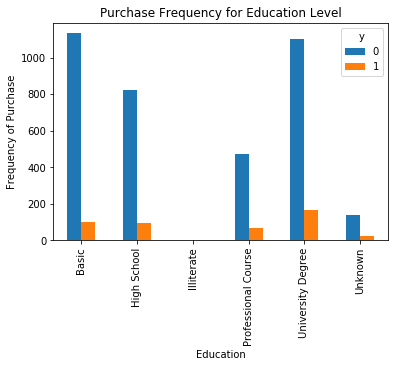

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(bank.education,bank.y).plot(kind='bar') 
plt.title('Purchase Frequency for Education Level') 
plt.xlabel('Education') 
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

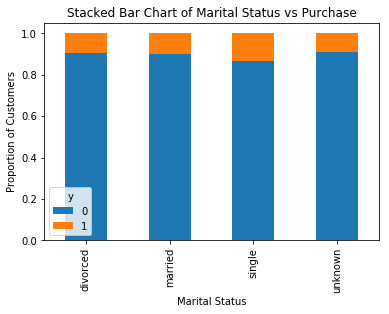

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
table=pd.crosstab(bank.marital,bank.y) 
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True) 
plt.title('Stacked Bar Chart of Marital Status vs Purchase') 
plt.xlabel('Marital Status') 
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

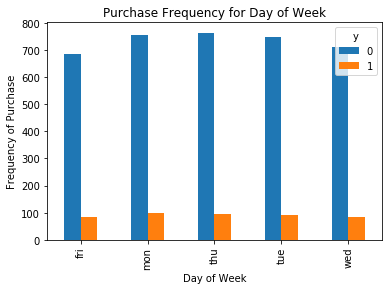

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt 
pd.crosstab(bank.day_of_week,bank.y).plot(kind='bar') 
plt.title('Purchase Frequency for Day of Week') 
plt.xlabel('Day of Week') 
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency')

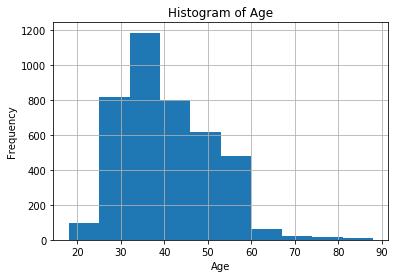

In [19]:
import matplotlib.pyplot as plt 
bank.age.hist() 
plt.title('Histogram of Age') 
plt.xlabel('Age') 
plt.ylabel('Frequency')

In [20]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'] 
for var in cat_vars:
    cat_list='var'+'_'+var    
    cat_list = pd.get_dummies(bank[var], prefix=var)    
    bank1=bank.join(cat_list)    
    bank=bank1

In [21]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'] 
bank_vars=bank.columns.values.tolist() 
to_keep=[i for i in bank_vars if i not in cat_vars] 

In [22]:
bank_final=bank[to_keep] 
bank_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [23]:
bank_final_vars=bank_final.columns.values.tolist() 
Y=['y'] 
X=[i for i in bank_final_vars if i not in Y ]

In [24]:
from sklearn import datasets 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 12) 
rfe = rfe.fit(bank_final[X],bank_final[Y] ) 
print(rfe.support_) 
print(rfe.ranking_) 

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True False  True False False False False False False  True False
  True]
[34 42 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 46 19 44
 31 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 47 37 28 43 29 11  1  7  1]


C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-package

In [25]:
cols=['previous', 'euribor3m', 'job_entrepreneur', 'job_self-employed', 'poutcome_success', 'poutcome_failure', 'month_oct', 'month_may',    'month_mar', 'month_jun', 'month_jul', 'month_dec'] 
X=bank_final[cols] 
Y=bank_final['y']

In [26]:
import statsmodels.api as sm 
logit_model=sm.Logit(Y,X) 
result=logit_model.fit() 
result.summary()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Fri, 01 Feb 2019   Pseudo R-squ.:                  0.1918
Time:                        22:28:16   Log-Likelihood:                -1149.9
converged:                       True   LL-Null:                       -1422.9
                                        LLR p-value:                4.975e-110
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
previous              0.3493      0.141      2.475      0.013       0.073       0.626
euribor3m            -0.6253      0.026    -23.615      0.000      -0.677      -0.573
job_entrepreneur     -0.4842      0.382     -1.269      0.205      -1.232       0.264
job_self-employed    -0.4626      0.328     -1.413      0.158      -1.105       0.179
poutcome_success      0.7788      0.289      2.697      0.007       0.213       1.345
poutcome_failure     -1.0450      0.245     -4.260      0.000      -1.526      -0.564
month_oct             0.0707      0.270      0.262      0.793      -0.458       0.600
month_may            -1.0490      0.126     -8.302      0.000      -1.297      -0.801
month_mar             1.0612      0.315      3.367      0.001       0.443       1.679
month_jun             0.3431      0.169      2.031      0.042       0.012       0.674
month_jul             0.3280      0.184      1.781      0.075      -0.033       0.689
month_dec             0.7147      0.466      1.533      0.125      -0.199       1.628
=====================================================================================
"""

In [27]:
from sklearn import linear_model 
clf = linear_model.LogisticRegression() 
clf.fit(X, Y) 

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
clf.score(X,Y)

0.9021607186210245

In [29]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [30]:
from sklearn import linear_model 
from sklearn import metrics 
clf1 = linear_model.LogisticRegression() 
clf1.fit(X_train, Y_train)

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
probs = clf1.predict_proba(X_test) 

In [32]:
predicted = clf1.predict(X_test)

In [33]:
import pandas as pd 
import numpy as np 
prob=probs[:,1] 
prob_df=pd.DataFrame(prob) 
prob_df['predict']=np.where(prob_df[0]>=0.10,1,0) 
prob_df.head() 

,0,predict
0,0.066478,0
1,0.117406,1
2,0.069593,0
3,0.062666,0
4,0.065086,0


In [34]:
metrics.accuracy_score(Y_test, predicted) 

0.9021035598705501

In [35]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy', cv=8) 
print(scores)
scores.mean() 

[0.91860465 0.90310078 0.89534884 0.90679612 0.89883268 0.89299611
 0.90466926 0.89883268]


C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-package

0.9023976399212946

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn import linear_model 
from sklearn import metrics 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 
clf1 = linear_model.LogisticRegression() 
clf1.fit(X_train, Y_train) 
probs = clf1.predict_proba(X_test)

C:\Users\kran0007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
prob=probs[:,1] 
prob_df=pd.DataFrame(prob) 
prob_df['predict']=np.where(prob_df[0]>=0.05,1,0) 
prob_df['actual']=Y_test 
prob_df.head() 

,0,predict,actual
0,0.066478,1,NaN
1,0.117406,1,0.0
2,0.069593,1,0.0
3,0.062666,1,NaN
4,0.065086,1,0.0


In [38]:
confusion_matrix=pd.crosstab(prob_df['actual'],prob_df['predict']) 
confusion_matrix

predict,0,1
actual,,
0.0,116,222
1.0,14,21


Text(0.5, 1.0, 'ROC Curve')

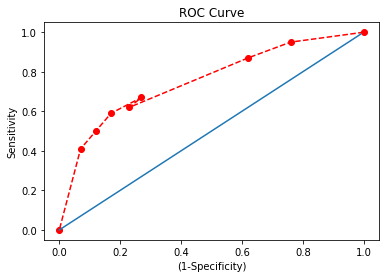

In [39]:
import matplotlib.pyplot as plt 
%matplotlib inline 
Sensitivity=[1,0.95,0.87,0.62,0.67,0.59,0.5,0.41,0] 
FPR=[1,0.76,0.62,0.23,0.27,0.17,0.12,0.07,0] 
plt.plot(FPR,Sensitivity,marker='o',linestyle='--',color='r') 
x=[i*0.01 for i in range(100)] 
y=[i*0.01 for i in range(100)] 
plt.plot(x,y) 
plt.xlabel('(1-Specificity)') 
plt.ylabel('Sensitivity') 
plt.title('ROC Curve')